In [6]:
import os
import sys
import numpy as np
import spikeoutputs as so
import spikeplots as sp
import celltype_io as ctio
import importlib
importlib.reload(so)
importlib.reload(sp)
importlib.reload(ctio)

import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import numpy as np

import visionloader as vl
import os

import seaborn as sns

In [7]:
str_experiment = '20230725C'
str_algo = 'kilosort2'
str_chunk = 'chunk3'

str_analysis_dir = '/Volumes/SrinDrive/'

str_exp_dir = os.path.join(str_analysis_dir, str_experiment, str_chunk, str_algo)
str_class = 'kilosort2.classification.txt'

str_params = 'kilosort2.params'

d_paths = {'str_experiment': str_experiment, 'paramsfile': os.path.join(str_exp_dir, str_params), 
           'dataset_name': str_algo, 'str_protocol': 'noise', 
           'str_classification': os.path.join(str_exp_dir, str_class), 'str_chunk': str_chunk}

data = so.SpikeOutputs(**d_paths)
data.load_sta()

In [8]:
str_datafile = '/Users/srinidhienaidu/Desktop/Rieke Lab Data/20230725C_kilosort2_data023_data024_data025_data026_data027_data028__dimflash.p'
with open(str_datafile, "rb") as f:
   d_data = pickle.load(f)

# vcd = vl.load_vision_data(str_datafile, sort_algorithm, include_params = True, include_neurons = True)

In [9]:
spike_array = d_data['spike_array']
spike_dict = d_data['spike_dict']
spot_intensity = d_data['spot_intensity']
# avg_psth = d_data['avg_psth']
cluster_id = list(spike_dict.keys())
pre_pts = d_data['pre_pts'][0]
stim_pts = d_data['stim_pts'][0]
tail_pts = d_data['tail_pts'][0]
bin_rate = d_data['bin_rate']
unique_params = d_data['unique_params']
params = d_data['params']

In [10]:
data.d_sta[1]
data.types.print_summary(b_only_main_types=True)

Total number of cells: 516
No OffP
No OffM
Number of OnP: 75
Number of OnM: 115
No SBC


In [11]:
OnP_ID = sorted(data.types.d_main_IDs['OnP'])

cell_ids = np.intersect1d(OnP_ID, cluster_id)
cell_idx = np.where(np.isin(cluster_id, OnP_ID))[0]
OnP_ID.remove(641)
cell_response = [spike_dict[key] for key in OnP_ID]
cell_response = np.array(cell_response)

(74, 1200)


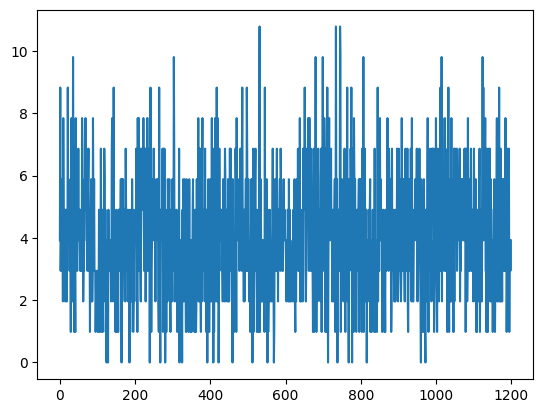

In [17]:
u_int = np.unique(spot_intensity)
cell_1 = cell_response[1]
test = np.zeros((len(OnP_ID), len(u_int), 1))

test1 = np.zeros((len(OnP_ID), (len(spot_intensity))))
count = 0 


for cell in np.arange(len(OnP_ID)):
    for int in np.arange(len(spot_intensity)):
        val = np.average(cell_response[cell, int, :])
        test1[cell, int] = val

print(test1.shape)

plt.plot(test1[73])


# for cell in np.arange(len(OnP_ID)):
#     for int in np.arange(len(u_int)): 
#         for flash in np.arange(len(spot_intensity)): 
#             if u_int[int] == spot_intensity[flash]: 
#                 test[cell, int, 0] += (cell_response[cell, flash, 0])/200

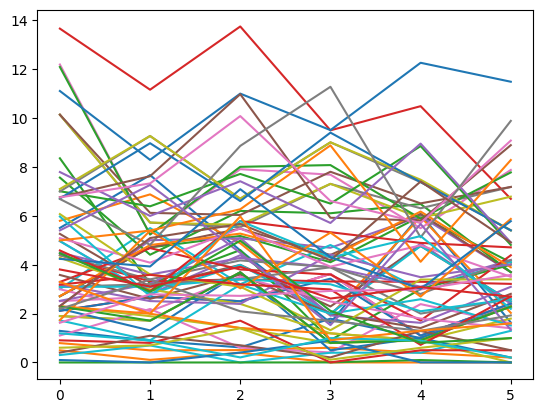

In [334]:
for cell in np.arange(len(OnP_ID)):
    plt.plot(test[cell, :, :])

# plt.plot(test[3, :, :])
